# Twitter <font color="red"> API
<img src="https://help.twitter.com/content/dam/help-twitter/brand/logo.png" title="Twitter"/>

You can have access at Twitter API sign up on <a href="https://developer.twitter.com/en" title="Twitter">Twitter Developer Platform</a> 


In [60]:
import pandas as pd
import tweepy
import re
from textblob import TextBlob 
import seaborn as sns

In [61]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS

In [ ]:
consumerKey = "Type your consumer key here"
consumerSecret = "Type your consumer secret here"
accessToken = "Type your accedd token here"
accessTokenSecret = "Type your access token secret here"

In [62]:
#%run ./Tweeter_keys.ipynb

In [15]:
# create authetication objcet
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#set token 
auth.set_access_token(access_token,access_token_secret)
#create api object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [63]:
#Gather 1000 retweets about Ucraine War
search_term = '#Crypto -filter:retweets'
#create cursor object
tweets = tweepy.Cursor(api.search_tweets, q = search_term, lang="en", tweet_mode="extended").items(1000)
all_tweets = [tweet.full_text for tweet in tweets]

In [64]:
data = pd.DataFrame(all_tweets, columns=['Tweets'])
data.head(10)

,Tweets
0,"Market down, Sam Dog Coin up. Backing this mem..."
1,🥳 Fancythattoken: A BEP-20 Fancy That Tokens G...
2,"Divi Project Update (June 28, 2022) https://t...."
3,"@inkfinance Best project ever , I am very happ..."
4,#Bitcoin Last Price $20297 #BTC 🚀\nDaily Indic...
5,Let me add: \n\nA token facilitating a $10bn T...
6,I'll wait for #btc till 15min resets to Zero b...
7,Lovense ID: CryptoBae_JoJo \n\n#Lush #lush3 #l...
8,New Low Price 📉 🤔\nLTCUSDT has reached a new 2...
9,@KriptoSener @fitfiii @AGY171120 @farukor47090...


## Purpose of the Analysis

Perform a briefly sentiment analysis in order to find the most related words and attitude about Crypto

### Sentiment Analysis

<img src="https://kw143.github.io/CS4641Project/visualizations/sentiment.jpg" title="Sentiment analylis"/>

Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.


## Data Cleaning

In [65]:
#create a clean function
def clean_twt(twt):
    twt = re.sub('#[A-Za-z0-9]+', '', twt) #remove hastag
    twt = re.sub('@[A-Za-z0-9]+', '', twt) #remove tag
    twt = re.sub('_[A-Za-z0-9]+', '', twt) #remove tag
    twt = re.sub('https?:\/\/\S+', '', twt) #rmeove link
    twt = re.sub('\\n', '', twt) #remove /n
    twt = re.sub('[@.,;"?!\'():#$]', '', twt)
    twt = re.sub('  ', ' ', twt)
    twt = re.sub('   ', ' ', twt)
    twt = re.sub('&amp', ' ', twt)

    twt = twt.lower()

    twt = twt.strip() #remove space from righ and left
    
    return twt

In [66]:
data['Tweets'] = data['Tweets'].apply(clean_twt)
data.head(10)

,Tweets
0,market down sam dog coin up backing this meme ...
1,🥳 fancythattoken a bep-20 fancy that tokens gi...
2,divi project update june 28 2022 via
3,best project ever i am very happy to be partic...
4,last price 20297 🚀daily indicators•pivot fibon...
5,let me add a token facilitating a 10bn tvl 1...
6,ill wait for till 15min resets to zero blue li...
7,lovense id cryptobae
8,new low price 📉 🤔ltcusdt has reached a new 24 ...
9,at devolution we build for the future 🚀we are ...


In [67]:
data.drop_duplicates(inplace = True)
data.head(10)

,Tweets
0,market down sam dog coin up backing this meme ...
1,🥳 fancythattoken a bep-20 fancy that tokens gi...
2,divi project update june 28 2022 via
3,best project ever i am very happy to be partic...
4,last price 20297 🚀daily indicators•pivot fibon...
5,let me add a token facilitating a 10bn tvl 1...
6,ill wait for till 15min resets to zero blue li...
7,lovense id cryptobae
8,new low price 📉 🤔ltcusdt has reached a new 24 ...
9,at devolution we build for the future 🚀we are ...


## Data Analysis

In [68]:
def get_subjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

def get_polarity(twt):
    return TextBlob(twt).sentiment.polarity
    
def get_sentiment(score):
    if score <0:
        return 'negative'
    if score ==0:
        return 'neutral'
    if score >0:
        return 'positive'

In [69]:
data['Subjectivity'] = data['Tweets'].apply(get_subjectivity) 
data['Polarity'] = data['Tweets'].apply(get_polarity)
data['Sentiment'] = data['Polarity'].apply(get_sentiment)

In [70]:
data.head(10)

,Tweets,Subjectivity,Polarity,Sentiment
0,market down sam dog coin up backing this meme ...,0.567989,0.007804,positive
1,🥳 fancythattoken a bep-20 fancy that tokens gi...,0.000000,0.000000,neutral
2,divi project update june 28 2022 via,0.000000,0.000000,neutral
3,best project ever i am very happy to be partic...,0.481250,0.625000,positive
4,last price 20297 🚀daily indicators•pivot fibon...,0.044444,0.000000,neutral
5,let me add a token facilitating a 10bn tvl 1...,0.000000,0.000000,neutral
6,ill wait for till 15min resets to zero blue li...,0.466667,-0.166667,negative
7,lovense id cryptobae,0.000000,0.000000,neutral
8,new low price 📉 🤔ltcusdt has reached a new 24 ...,0.377273,0.068182,positive
9,at devolution we build for the future 🚀we are ...,0.605000,0.420000,positive


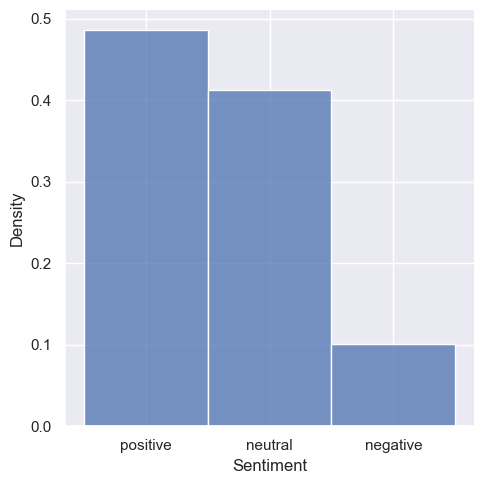

In [71]:
sns.displot(data, x="Sentiment", multiple="dodge", stat="density")

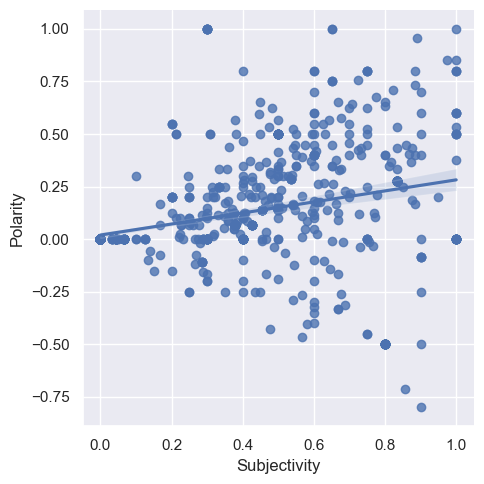

In [72]:
sns.lmplot(data=data, x="Subjectivity", y="Polarity")

### Remove stop word to find the most used words

In [73]:
print(STOPWORDS)

frozenset({'the', 'then', 'who', 'for', 'it', 'someone', 'somehow', 'however', 'during', 'together', 'under', 'become', 'one', 'was', 'five', 'please', 'thereby', 'while', 'been', 'towards', 'yourself', 'latterly', 'side', 'if', 'due', 'is', 'sixty', 'should', 'became', 'amoungst', 'just', 'whereby', 'make', 'cry', 'twelve', 'mine', 'amongst', 'eight', 'system', 'since', 'others', 'various', 'namely', 'which', 'will', 'almost', 'down', 'back', 'via', 'eg', 'perhaps', 're', 'noone', 'front', 'six', 'nine', 'full', 'being', 'neither', 'formerly', 'though', 'behind', 'up', 'such', 'still', 'where', 'much', 'did', 'didn', 'take', 'whatever', 'interest', 'seem', 'either', 'their', 'empty', 'already', 'several', 'fifteen', 'anyway', 'besides', 'because', 'myself', 'hasnt', 'inc', 'ourselves', 'my', 'never', 'until', 'beyond', 'else', 'other', 'so', 'about', 'show', 'through', 'keep', 'what', 'have', 'km', 'etc', 'by', 'ever', 'three', 'i', 'see', 'latter', 'indeed', 'call', 'can', 'something

In [74]:
data['Tweets'] = data['Tweets'].apply(remove_stopwords)
data.head(10)

,Tweets,Subjectivity,Polarity,Sentiment
0,market sam dog coin backing meme coin hard rig...,0.567989,0.007804,positive
1,🥳 fancythattoken bep-20 fancy tokens giveaway 🎉🎊,0.000000,0.000000,neutral
2,divi project update june 28 2022,0.000000,0.000000,neutral
3,best project happy participating project hope ...,0.481250,0.625000,positive
4,price 20297 🚀daily indicators•pivot fibonacci ...,0.044444,0.000000,neutral
5,let add token facilitating 10bn tvl 10m transa...,0.000000,0.000000,neutral
6,ill wait till 15min resets zero blue line 0 wa...,0.466667,-0.166667,negative
7,lovense id cryptobae,0.000000,0.000000,neutral
8,new low price 📉 🤔ltcusdt reached new 24 hour l...,0.377273,0.068182,positive
9,devolution build future 🚀we proud welcome roll...,0.605000,0.420000,positive


In [75]:
words = [tweet.split(" ") for tweet in data['Tweets']]

In [76]:
words[:5]

[['market',
  'sam',
  'dog',
  'coin',
  'backing',
  'meme',
  'coin',
  'hard',
  'right',
  'especially',
  'considering',
  'deal',
  'dyor',
  'stay',
  'safe',
  'runs',
  'hard',
  'imo',
  'samo',
  'youre',
  'animal',
  'maybe',
  '💅'],
 ['🥳', 'fancythattoken', 'bep-20', 'fancy', 'tokens', 'giveaway', '🎉🎊'],
 ['divi', 'project', 'update', 'june', '28', '2022'],
 ['best',
  'project',
  'happy',
  'participating',
  'project',
  'hope',
  'project',
  'gain',
  'popularity',
  'future'],
 ['price',
  '20297',
  '🚀daily',
  'indicators•pivot',
  'fibonacci',
  '-support',
  '1',
  '27775',
  '-s2',
  '24635',
  '-s3',
  '19554',
  '-middle',
  '32857',
  '-resistance',
  '1',
  '37938',
  'price',
  '1158',
  '•pivot',
  '-s1',
  '1724',
  '-s2',
  '1426',
  '-s3',
  '944',
  '-m',
  '2206',
  '-r1',
  '2688',
  '3/3135800']]

In [77]:
flat_words = [x for xs in words for x in xs if (len(x)>3)]

In [78]:
data_words = pd.DataFrame(flat_words, columns=["Words"])
data_words['n'] = 1

In [79]:
data_words.head(10)

,Words,n
0,market,1
1,coin,1
2,backing,1
3,meme,1
4,coin,1
5,hard,1
6,right,1
7,especially,1
8,considering,1
9,deal,1


In [80]:
data_words_g = data_words.groupby(by = 'Words', dropna=True,as_index=False)['n'].sum()

In [81]:
data_words_g = data_words_g.sort_values(by="n",ascending=False)

In [82]:
data_words_g

,Words,n
2358,price,273
2389,project,84
1731,hour,72
2467,reached,70
2857,theres,53
...,...,...
1171,contagion-,1
1172,content,1
1173,content/memes,1
1174,contents,1


In [83]:
data_words_g = data_words_g[(data_words_g['Words'] != 'crypto')]
data_words_g[:8]

,Words,n
2358,price,273
2389,project,84
1731,hour,72
2467,reached,70
2857,theres,53
2979,unique,53
2457,rare,52
1890,late,52


<AxesSubplot:xlabel='Words', ylabel='n'>

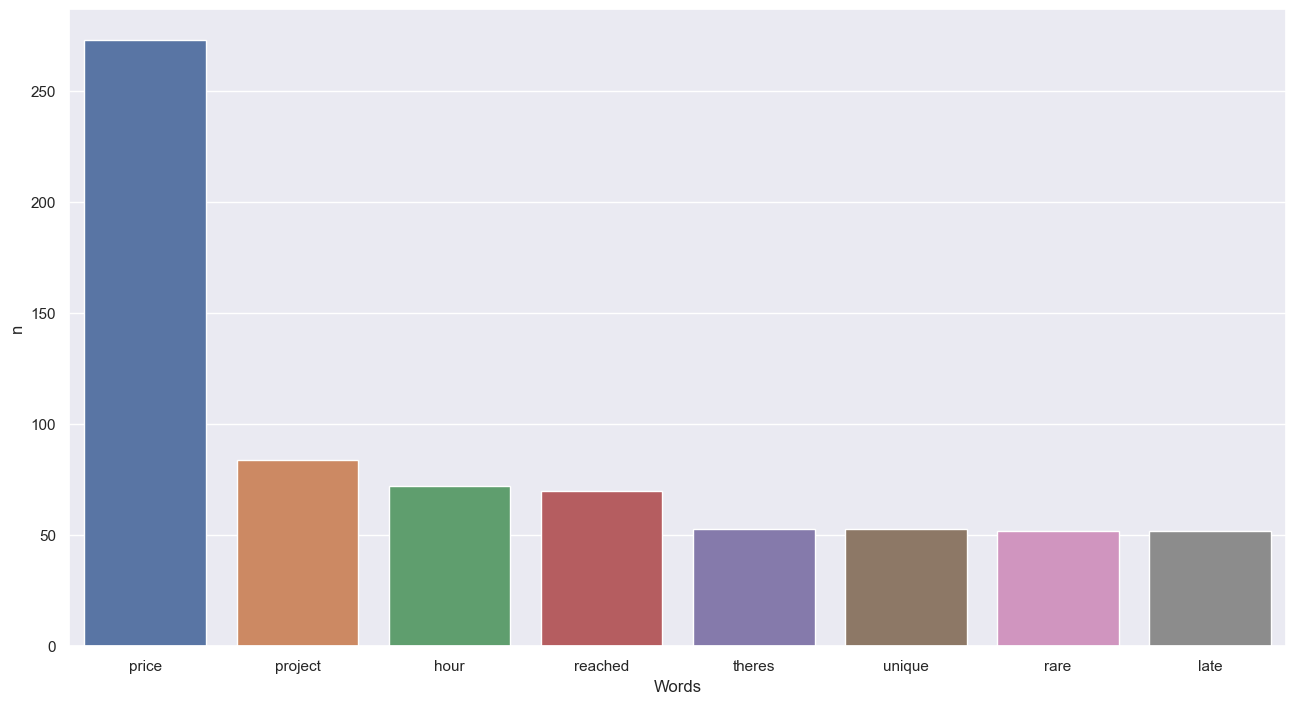

In [84]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x='Words', y = 'n', data=data_words_g[:8])